<a href="https://colab.research.google.com/github/amisaid/Machine-Learning-for-Water-Optical-Properties-Using-Satellite-Imagery/blob/main/ioccg_regression_25thMarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing the libraries



In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Impporting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing libraries
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### 2. Importing the dataset and assessing it

In [ ]:
# Loading the dataset
# dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/.../data.csv')
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/.../data.csv')


dataset.columns

Index(['velEast', 'velNorth', 'SSS', 'SSH', 'Chla', 'potentialSST',
       'b1_chlC2RCC', 'chlC2X', 'tsmC2X', 'B4C2RCC', 'B4C2X', 'B3C2RCC',
       'B3C2X', 'B2C2RCC', 'B2C2X'],
      dtype='object')

In [ ]:
# Renaming some of column names
df = dataset.rename(columns={"potentialSST": "sst", "b1_chlC2RCC": "chlC2RCC", "velEast": "windE", "velNorth": "windN","SSH": "ssh","SSS": "sss"})

df.head()

,windE,windN,sss,ssh,Chla,sst,chlC2RCC,chlC2X,tsmC2X,B4C2RCC,B4C2X,B3C2RCC,B3C2X,B2C2RCC,B2C2X
0,-0.008228,-0.008228,34.149376,-0.318,0.614627,8.371092,0.066808,0.047561,0.253624,0.000453,0.000770,0.003002,0.004776,0.005871,0.006283
1,0.020036,0.020036,34.385132,-0.329,0.614627,8.454489,0.034145,0.026885,0.294405,0.000491,0.000741,0.003330,0.004915,0.007509,0.007824
2,0.020989,0.020989,34.150837,-0.315,NaN,8.389182,1.390329,4.040084,5.130152,0.003173,0.005003,0.002041,0.003666,0.000891,0.001508
3,0.075708,0.075708,34.468140,-0.326,NaN,8.686494,0.411744,0.039681,0.256572,0.000418,0.000712,0.001776,0.003118,0.002078,0.003071
4,0.020989,0.020989,34.150837,-0.316,NaN,8.389182,0.326201,0.024829,0.797003,0.000748,0.000895,0.001955,0.003058,0.001665,0.002614


In [ ]:
df.columns

Index(['windE', 'windN', 'sss', 'ssh', 'Chla', 'sst', 'chlC2RCC', 'chlC2X',
       'tsmC2X', 'B4C2RCC', 'B4C2X', 'B3C2RCC', 'B3C2X', 'B2C2RCC', 'B2C2X'],
      dtype='object')

In [ ]:
# Data statistics before cleaning null values
df.describe()

,windE,windN,sss,ssh,Chla,sst,chlC2RCC,chlC2X,tsmC2X,B4C2RCC,B4C2X,B3C2RCC,B3C2X,B2C2RCC,B2C2X
count,274.000000,274.000000,274.000000,284.000000,1.630000e+02,274.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.021942,0.021942,34.317147,-0.324968,6.146271e-01,8.509376,0.956203,0.158715,1.844739,0.001229,0.002040,0.002921,0.004285,0.003583,0.004183
std,0.025530,0.025530,0.178199,0.015710,1.113644e-15,0.140806,2.656429,0.625123,7.047137,0.003672,0.008588,0.003354,0.005109,0.002635,0.002754
min,-0.008228,-0.008228,34.068527,-0.357000,6.146271e-01,8.355371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.004671,-0.004671,34.149741,-0.335500,6.146271e-01,8.375614,0.049347,0.024447,0.203286,0.000392,0.000630,0.001651,0.002678,0.001595,0.002603
50%,0.022529,0.022529,34.261978,-0.321000,6.146271e-01,8.454489,0.114144,0.034098,0.354565,0.000534,0.000801,0.002377,0.003776,0.003100,0.003738
75%,0.031368,0.031368,34.468140,-0.314000,6.146271e-01,8.652973,0.455014,0.049368,0.756671,0.000748,0.000998,0.003351,0.004920,0.005292,0.005856
max,0.075708,0.075708,34.671577,-0.294000,6.146271e-01,8.733246,22.553467,6.858617,72.541969,0.039429,0.112926,0.035333,0.069905,0.016419,0.024138


In [ ]:
# No. of data in dataset
len(df)

300

In [ ]:
# Count of columns with NaN
df.isnull().sum()

,0
windE,26
windN,26
sss,26
ssh,16
Chla,137
sst,26
chlC2RCC,1
chlC2X,1
tsmC2X,1
B4C2RCC,1


'OBJECTID', 'CID', 'velocityEastward', 'velocityNorthward', 'SSS',
       'SSH', 'Chla', 'SST', 'chlC2RCC', 'chlC2X', 'tsmC2RCC', 'tsmC2X',
       'b2_tsmC2X', 'rhown4C2RCC', 'rhown4C2X', 'rhown3C2RCC', 'rhown3C2X',
       'rhown2C2RCC'],
      dtype='object'

In [ ]:
# List of columns you want to check for null values and drop rows accordingly
subset_cols = ['windE', 'windN', 'ssh', 'sss', 'sst', 'Chla', 'chlC2RCC', 'chlC2X', 'tsmC2RCC','tsmC2X', 'B4C2RCC', 'B4C2X', 'B3C2RCC','B3C2X', 'B2C2RCC', 'B2C2X']

# Get the columns that are actually in your DataFrame
existing_cols = df.columns

# Find the common columns between your desired subset and existing columns
valid_subset = [col for col in subset_cols if col in existing_cols]

# Now use the valid subset in dropna
df.dropna(subset=valid_subset, inplace=True)

# Confirming no null values in the specified columns
df.isnull().sum()

,0
windE,0
windN,0
sss,0
ssh,0
Chla,0
sst,0
chlC2RCC,0
chlC2X,0
tsmC2X,0
B4C2RCC,0


In [ ]:
# Remove null values from dataframe
df.dropna(subset=['windE', 'windN', 'ssh', 'sss', 'sst', 'Chla', 'chlC2RCC', 'chlC2X', 'tsmC2X', 'B4C2RCC', 'B4C2X', 'B3C2RCC','B3C2X', 'B2C2RCC', 'B2C2X' ], inplace=True)

# # Confirming no null values
df.isnull().sum()

,0
windE,0
windN,0
sss,0
ssh,0
Chla,0
sst,0
chlC2RCC,0
chlC2X,0
tsmC2X,0
B4C2RCC,0


In [ ]:
# Checking the data formats
df.dtypes

,0
windE,float64
windN,float64
sss,float64
ssh,float64
Chla,float64
sst,float64
chlC2RCC,float64
chlC2X,float64
tsmC2X,float64
B4C2RCC,float64


In [ ]:
# Summary statistics after removing null values
df.describe()

,windE,windN,sss,ssh,Chla,sst,chlC2RCC,chlC2X,tsmC2X,B4C2RCC,B4C2X,B3C2RCC,B3C2X,B2C2RCC,B2C2X
count,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.008585,0.008585,34.373939,-0.334619,6.146271e-01,8.528369,0.304228,0.037427,0.391189,0.000546,0.000794,0.002905,0.004252,0.004788,0.005278
std,0.017563,0.017563,0.167259,0.013706,1.002338e-15,0.138963,1.682017,0.031592,0.793958,0.000649,0.000695,0.001736,0.002025,0.002359,0.002381
min,-0.008228,-0.008228,34.149376,-0.357000,6.146271e-01,8.371092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.004671,-0.004671,34.258877,-0.347000,6.146271e-01,8.391663,0.039536,0.025930,0.173878,0.000356,0.000621,0.002013,0.003257,0.003203,0.003954
50%,-0.003092,-0.003092,34.386929,-0.331000,6.146271e-01,8.621575,0.075079,0.035632,0.277968,0.000465,0.000736,0.002842,0.004430,0.004865,0.005293
75%,0.031368,0.031368,34.494137,-0.322750,6.146271e-01,8.652973,0.127634,0.047639,0.391651,0.000579,0.000870,0.003569,0.005204,0.006496,0.007003
max,0.036540,0.036540,34.671577,-0.316000,6.146271e-01,8.733246,18.024397,0.360428,9.372102,0.007555,0.008213,0.014956,0.015965,0.011038,0.011873


In [ ]:
len(df)

160

In [ ]:
# Correlation matrix between variables
corr_matrix = df.corr()
corr_matrix

,windE,windN,sss,ssh,Chla,sst,chlC2RCC,chlC2X,tsmC2X,B4C2RCC,B4C2X,B3C2RCC,B3C2X,B2C2RCC,B2C2X
windE,1.000000,1.000000,0.515440,-0.537085,NaN,0.652071,0.171740,0.167576,0.155700,0.145986,0.121959,0.068413,0.012242,-0.229220,-0.212666
windN,1.000000,1.000000,0.515440,-0.537085,NaN,0.652071,0.171740,0.167576,0.155700,0.145986,0.121959,0.068413,0.012242,-0.229220,-0.212666
sss,0.515440,0.515440,1.000000,-0.813822,NaN,0.952253,0.096957,0.228359,0.107005,0.131654,0.137846,0.216590,0.211008,0.137041,0.129371
ssh,-0.537085,-0.537085,-0.813822,1.000000,NaN,-0.846207,-0.108126,-0.223135,-0.135120,-0.153935,-0.142805,-0.264118,-0.227990,-0.154960,-0.119810
Chla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sst,0.652071,0.652071,0.952253,-0.846207,NaN,1.000000,0.119082,0.232386,0.126613,0.143941,0.141493,0.189403,0.167313,0.012501,0.013031
chlC2RCC,0.171740,0.171740,0.096957,-0.108126,NaN,0.119082,1.000000,0.852620,0.933934,0.907489,0.878563,0.616532,0.496797,-0.015750,-0.003861
chlC2X,0.167576,0.167576,0.228359,-0.223135,NaN,0.232386,0.852620,1.000000,0.910904,0.934430,0.954176,0.834086,0.792606,0.307346,0.336343
tsmC2X,0.155700,0.155700,0.107005,-0.135120,NaN,0.126613,0.933934,0.910904,1.000000,0.990368,0.970748,0.769689,0.664741,0.138119,0.153033
B4C2RCC,0.145986,0.145986,0.131654,-0.153935,NaN,0.143941,0.907489,0.934430,0.990368,1.000000,0.990710,0.845648,0.756603,0.240884,0.261041


In [ ]:
# Remove column name 'chla'
# df.drop(columns='Chla', axis=1)
df.drop(['Chla'], axis=1)

df.columns

Index(['windE', 'windN', 'sss', 'ssh', 'Chla', 'sst', 'chlC2RCC', 'chlC2X',
       'tsmC2X', 'B4C2RCC', 'B4C2X', 'B3C2RCC', 'B3C2X', 'B2C2RCC', 'B2C2X'],
      dtype='object')

## C2RCC

In [ ]:
df_c2rcc = pd.DataFrame([df.chlC2RCC, df.sss, df.sst, df.ssh, df.B4C2RCC, df.B3C2RCC, df.B2C2RCC, df.windE, df.windN]).transpose()
# df_c2rcc = pd.DataFrame([df.chlC2RCC, df.B4C2RCC, df.B3C2RCC, df.B2C2RCC,df.SSH, df.SSS,df.SST, df.tsmC2RCC]).transpose()
df_c2rcc.head()

,chlC2RCC,sss,sst,ssh,B4C2RCC,B3C2RCC,B2C2RCC,windE,windN
0,0.066808,34.149376,8.371092,-0.318,0.000453,0.003002,0.005871,-0.008228,-0.008228
1,0.034145,34.385132,8.454489,-0.329,0.000491,0.003330,0.007509,0.020036,0.020036
6,0.053539,34.149376,8.371092,-0.318,0.000326,0.001800,0.003037,-0.008228,-0.008228
8,0.073614,34.149376,8.371092,-0.316,0.000481,0.002388,0.003396,-0.008228,-0.008228
9,0.151836,34.494137,8.652973,-0.342,0.000733,0.004288,0.006419,0.031368,0.031368


In [ ]:
df_c2rcc = df_c2rcc.rename(columns={"chlC2RCC": "chl", "B2C2RCC": "blue", "B3C2RCC":"green","B4C2RCC":"red"})

In [ ]:
# Checking correlation matrix after dropping Chla column
corr_matrix_c2rcc = df_c2rcc.corr()
corr_matrix_c2rcc

,chl,sss,sst,ssh,red,green,blue,windE,windN
chl,1.000000,0.096957,0.119082,-0.108126,0.907489,0.616532,-0.015750,0.171740,0.171740
sss,0.096957,1.000000,0.952253,-0.813822,0.131654,0.216590,0.137041,0.515440,0.515440
sst,0.119082,0.952253,1.000000,-0.846207,0.143941,0.189403,0.012501,0.652071,0.652071
ssh,-0.108126,-0.813822,-0.846207,1.000000,-0.153935,-0.264118,-0.154960,-0.537085,-0.537085
red,0.907489,0.131654,0.143941,-0.153935,1.000000,0.845648,0.240884,0.145986,0.145986
green,0.616532,0.216590,0.189403,-0.264118,0.845648,1.000000,0.664613,0.068413,0.068413
blue,-0.015750,0.137041,0.012501,-0.154960,0.240884,0.664613,1.000000,-0.229220,-0.229220
windE,0.171740,0.515440,0.652071,-0.537085,0.145986,0.068413,-0.229220,1.000000,1.000000
windN,0.171740,0.515440,0.652071,-0.537085,0.145986,0.068413,-0.229220,1.000000,1.000000


In [ ]:
# Plotting for visualization
# sn.heatmap(corr_matrix_c2rcc, annot=True);

## C2X

In [ ]:
# df_c2x = pd.DataFrame([df.chlC2X, df.tsmC2X, df.SSS, df.SST, df.SSH, df.B4C2X, df.B3C2X, df.B2C2X]).transpose()
# df_c2x.head()

df_c2x = pd.DataFrame([df.chlC2X, df.B4C2X, df.B3C2X, df.B2C2X,df.ssh, df.sss,df.sst, df.tsmC2X, df.windE, df.windN]).transpose()
df_c2x.head()

,chlC2X,B4C2X,B3C2X,B2C2X,ssh,sss,sst,tsmC2X,windE,windN
0,0.047561,0.000770,0.004776,0.006283,-0.318,34.149376,8.371092,0.253624,-0.008228,-0.008228
1,0.026885,0.000741,0.004915,0.007824,-0.329,34.385132,8.454489,0.294405,0.020036,0.020036
6,0.029449,0.000579,0.003054,0.003716,-0.318,34.149376,8.371092,0.148217,-0.008228,-0.008228
8,0.023869,0.000828,0.003705,0.003848,-0.316,34.149376,8.371092,0.315453,-0.008228,-0.008228
9,0.048268,0.001040,0.006043,0.007049,-0.342,34.494137,8.652973,0.522473,0.031368,0.031368


In [ ]:
# Rename column header
df_c2x = df_c2x.rename(columns={"chlC2X": "chl", "B2C2X": "blue", "B3C2X":"green","B4C2X":"red", "tsmC2X": "tsm"})

In [ ]:
# Checking correlation matrix after dropping Chla column
corr_matrix_c2x = df_c2x.corr()
corr_matrix_c2x

,chl,red,green,blue,ssh,sss,sst,tsm,windE,windN
chl,1.000000,0.954176,0.792606,0.336343,-0.223135,0.228359,0.232386,0.910904,0.167576,0.167576
red,0.954176,1.000000,0.801956,0.315155,-0.142805,0.137846,0.141493,0.970748,0.121959,0.121959
green,0.792606,0.801956,1.000000,0.773797,-0.227990,0.211008,0.167313,0.664741,0.012242,0.012242
blue,0.336343,0.315155,0.773797,1.000000,-0.119810,0.129371,0.013031,0.153033,-0.212666,-0.212666
ssh,-0.223135,-0.142805,-0.227990,-0.119810,1.000000,-0.813822,-0.846207,-0.135120,-0.537085,-0.537085
sss,0.228359,0.137846,0.211008,0.129371,-0.813822,1.000000,0.952253,0.107005,0.515440,0.515440
sst,0.232386,0.141493,0.167313,0.013031,-0.846207,0.952253,1.000000,0.126613,0.652071,0.652071
tsm,0.910904,0.970748,0.664741,0.153033,-0.135120,0.107005,0.126613,1.000000,0.155700,0.155700
windE,0.167576,0.121959,0.012242,-0.212666,-0.537085,0.515440,0.652071,0.155700,1.000000,1.000000
windN,0.167576,0.121959,0.012242,-0.212666,-0.537085,0.515440,0.652071,0.155700,1.000000,1.000000


[Text(0, 0.5, 'chl'),
 Text(0, 1.5, 'red'),
 Text(0, 2.5, 'green'),
 Text(0, 3.5, 'blue'),
 Text(0, 4.5, 'ssh'),
 Text(0, 5.5, 'sss'),
 Text(0, 6.5, 'sst'),
 Text(0, 7.5, 'tsm'),
 Text(0, 8.5, 'windE'),
 Text(0, 9.5, 'windN')]

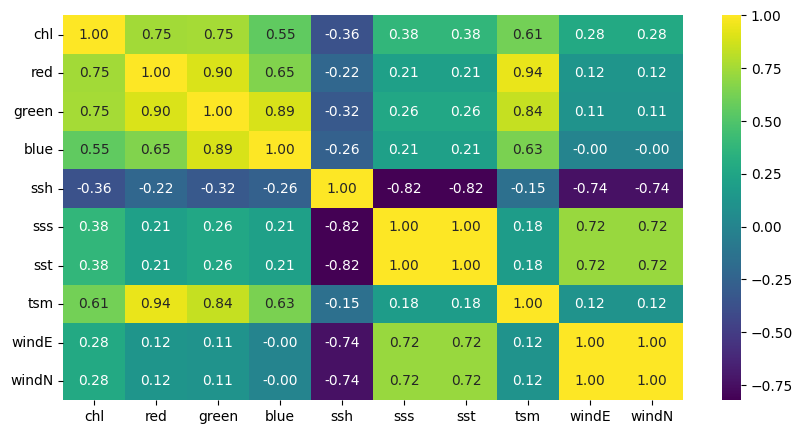

In [ ]:
# Spearman correlation
fig, ax = plt.subplots(figsize = (10, 5))
sn.heatmap(df_c2x.corr(method='spearman'), annot=True, fmt='.2f',
            cmap=plt.get_cmap('viridis'), cbar=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
# # plt.savefig('/content/drive/MyDrive/Colab Notebooks/.../Image1.png', bbox_inches='tight', pad_inches=0.0)
;

[Text(0, 0.5, 'chl'),
 Text(0, 1.5, 'red'),
 Text(0, 2.5, 'green'),
 Text(0, 3.5, 'blue'),
 Text(0, 4.5, 'ssh'),
 Text(0, 5.5, 'sss'),
 Text(0, 6.5, 'sst'),
 Text(0, 7.5, 'tsm'),
 Text(0, 8.5, 'windE'),
 Text(0, 9.5, 'windN')]

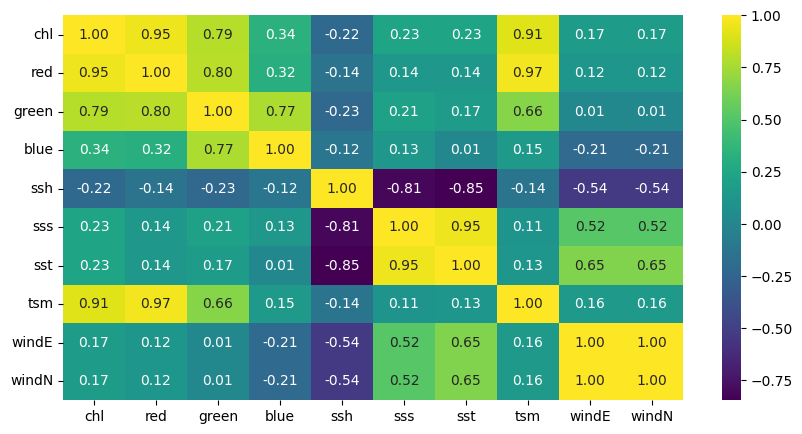

In [ ]:
# # Pearson correlation
fig, ax = plt.subplots(figsize = (10, 5))
sn.heatmap(df_c2x.corr(method='pearson'), annot=True, fmt='.2f',
            cmap=plt.get_cmap('viridis'), cbar=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
# # plt.savefig('/content/drive/MyDrive/image.png', bbox_inches='tight', pad_inches=0.0)
;

In [ ]:
# # Plotting for visualization
# sn.heatmap(corr_matrix_c2x, annot=True);

In [ ]:
# Splitting the dataset into training and testing
n_c2x = len(df_c2x)
n_c2x

160

In [ ]:
#  Split into train and test
n_c2x_test = int(n_c2x * 0.2)
n_c2x_train = n_c2x - n_c2x_test

# Verifying the sums tally
n_c2x_train, n_c2x_test, (n_c2x_train + n_c2x_test)

(128, 32, 160)

In [ ]:
# Selcting the train and test dataset
train_c2x_dataset = df_c2x.iloc[:n_c2x_train]
test_c2x_dataset = df_c2x.iloc[n_c2x_train:]
train_c2x_dataset.head()

,chl,red,green,blue,ssh,sss,sst,tsm,windE,windN
0,0.047561,0.000770,0.004776,0.006283,-0.318,34.149376,8.371092,0.253624,-0.008228,-0.008228
1,0.026885,0.000741,0.004915,0.007824,-0.329,34.385132,8.454489,0.294405,0.020036,0.020036
6,0.029449,0.000579,0.003054,0.003716,-0.318,34.149376,8.371092,0.148217,-0.008228,-0.008228
8,0.023869,0.000828,0.003705,0.003848,-0.316,34.149376,8.371092,0.315453,-0.008228,-0.008228
9,0.048268,0.001040,0.006043,0.007049,-0.342,34.494137,8.652973,0.522473,0.031368,0.031368


In [ ]:
# Creating label by "pop" of "chl" column
train_c2x_labels = train_c2x_dataset.pop("chl")
test_c2x_labels = test_c2x_dataset.pop("chl")

# Confirming pop is dropped from test_dataset
test_c2x_dataset.columns

Index(['red', 'green', 'blue', 'ssh', 'sss', 'sst', 'tsm', 'windE', 'windN'], dtype='object')

In [ ]:
test_c2x_labels.head()

,chl
227,0.003022
228,0.045498
229,0.018327
232,0.029696
235,0.065655


In [ ]:
# Create linear regression object
regr_c2x = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr_c2x.fit(train_c2x_dataset, train_c2x_labels)

# Make predictions using the testing set
chla_c2x_pred = regr_c2x.predict(test_c2x_dataset)

# Evaluate the model
mse_c2x = mean_squared_error(test_c2x_labels, chla_c2x_pred)
r2_c2x = r2_score(test_c2x_labels, chla_c2x_pred)
rmse_c2x = np.sqrt(mse_c2x)

# The coefficients
print("Coefficients: \n", regr_c2x.coef_)


# # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_c2x_labels, chla_c2x_pred))

# # The mean squared error
print("Mean square error: %.5f" % mean_squared_error(test_c2x_labels, chla_c2x_pred))

rmse_c2x = np.sqrt(mean_squared_error(test_c2x_labels, chla_c2x_pred))
# print("Root mean square error: %.5f" % {rmse})
print("Root mean square error: %.5f" % rmse_c2x)

Coefficients: 
 [ 8.54085297e+01 -6.94416768e+00  2.51335038e+00 -2.04547108e-01
 -5.66904009e-03  1.64731575e-02 -2.70596720e-02 -1.07702357e-02
 -1.07702357e-02]
Coefficient of determination: 0.87751
Mean square error: 0.00009
Root mean square error: 0.00933


In [ ]:
print("Prediction: ", chla_c2x_pred[:5])
print("True values: ", list(test_c2x_labels[:5]))
print("Difference: ", [f"{diff:.6f}" for diff in chla_c2x_pred[:5] - test_c2x_labels[:5]])

Prediction:  [0.01819527 0.03982842 0.03737663 0.02569009 0.04421282]
True values:  [0.003021637, 0.045498345, 0.018327087, 0.029696103, 0.065655008]
Difference:  ['0.015174', '-0.005670', '0.019050', '-0.004006', '-0.021442']


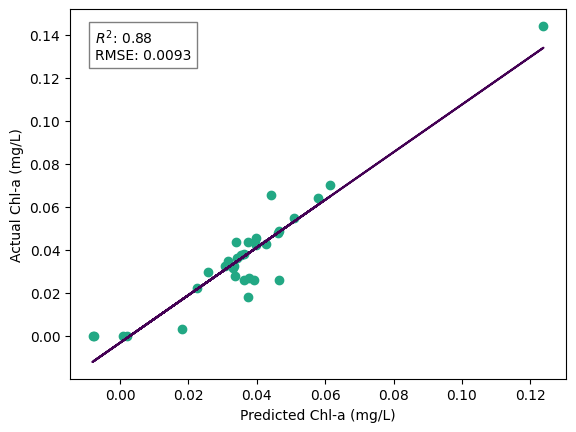

In [ ]:
# Scatter plot
plt.scatter(chla_c2x_pred, test_c2x_labels, color="#22A884", label="Data Points")
# 440154, 22A884
# Regression line
coefficients = np.polyfit(chla_c2x_pred, test_c2x_labels, 1)  # Fit a linear trend line
regression_line = np.polyval(coefficients, chla_c2x_pred)
plt.plot(chla_c2x_pred, regression_line, color="#440154", label="Regression Line")

# Calculate R^2
r2_c2x = r2_score(test_c2x_labels, chla_c2x_pred)

# # Add R^2 to the plot
# plt.text(
#     0.1, 0.9, f"$R^2 = {r2:.2f}$", fontsize=12, transform=plt.gca().transAxes,
#     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
# )

# Display R2 and RMSE on the plot
plt.text(0.05, 0.95, f"$R^2$: {r2_c2x:.2f}\nRMSE: {rmse_c2x:.4f}", transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Labels and legend
plt.xlabel("Predicted Chl-a (mg/L)")
plt.ylabel("Actual Chl-a (mg/L)")
# plt.legend()

# # Save figure
plt.savefig("/content/drive/MyDrive/Colab Notebook/...", dpi=300, bbox_inches="tight")  # Export the figure as a high-quality PNG file

plt.show()

Mean Squared Error: 5.848988147944289e-05
R-squared: 0.6687108288183201
Root Mean Squared Error: 0.007647867773402132


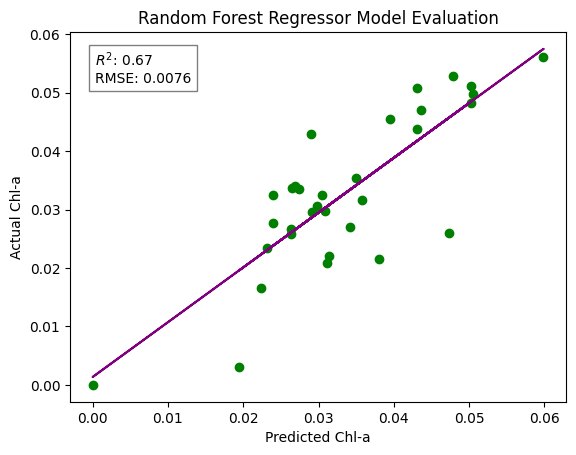

In [ ]:
# prompt: create RF model and evaluate it

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_c2x is your DataFrame and 'chl' is the target variable
X = df_c2x.drop('chl', axis=1)  # Features
y = df_c2x['chl']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example hyperparameters, tune as needed
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse_c2x_rf = mean_squared_error(y_test, y_pred)
r2_c2x_rf = r2_score(y_test, y_pred)
rmse_c2x_rf = np.sqrt(mse_c2x_rf)

print(f"Mean Squared Error: {mse_c2x_rf}")
print(f"R-squared: {r2_c2x_rf}")
print(f"Root Mean Squared Error: {rmse_c2x_rf}")

# Plot the results
plt.scatter(y_pred, y_test, color="green", label="Data Points")

# Regression line
coefficients = np.polyfit(y_pred, y_test, 1)
regression_line = np.polyval(coefficients, y_pred)
plt.plot(y_pred, regression_line, color="purple", label="Regression Line")

# Display R2 and RMSE on the plot
plt.text(0.05, 0.95, f"$R^2$: {r2_c2x_rf:.2f}\nRMSE: {rmse_c2x_rf:.4f}", transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel("Predicted Chl-a")
plt.ylabel("Actual Chl-a")
plt.title("Random Forest Regressor Model Evaluation")
# plt.legend()
plt.show()